In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
# df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv")
# df.to_csv("income.csv",index = False)

In [3]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


# Scatter plot without Cluster

Text(0.5, 1.0, 'Orginal Data')

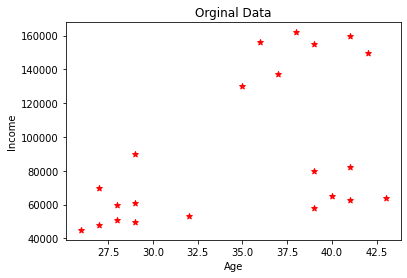

In [4]:
plt.scatter(df['Age'],df['Income($)'],color = 'red',marker ='*')
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Orginal Data")

kMeans Finds Clusters

In [5]:
# data ko 3 cluster mei divide kar day gye har cluster k aik center ho ga ,jo us k qareeb ho ga woe us ka point
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
df['cluster'] = y_predicted
df.head()   # ab har point  ko kisi aik cluster mei dal diyia hai

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [6]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [7]:
# now we get each cluster in a variable to make Visulization
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

# Make     **3**   Cluster Scatter Plot

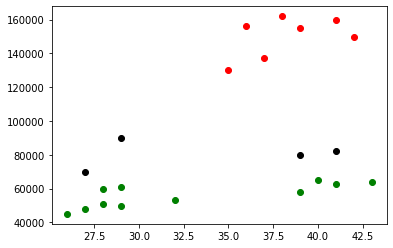

In [8]:
plt.scatter(df0['Age'],df0['Income($)'],color = 'green')
plt.scatter(df1['Age'],df1['Income($)'],color ='red')
plt.scatter(df2['Age'],df2['Income($)'],color ='black')

In [9]:
# Above Graph You see Cluster is Not Good Because X and y value have huge difference so pleas 
# do it Normalize function , it convert data into 0 to 1 Range

# **MinMaxScaler**

Income($) Columns Is Normalize

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.fit_transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


# Age Column Is Normalize

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Age']])
df['Age'] = scaler.fit_transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


# Now check Scatter Plot 
## **X_Axis** Scale is 0 to 1
## **Y_Axis** Scale is 0 to 1
## **Scale** is Normalized Visulized in scatter plot

In [12]:
# now we get each cluster in a variable to make Visulization
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

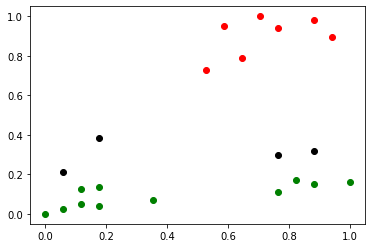

In [13]:
plt.scatter(df0['Age'],df0['Income($)'],color = 'green')
plt.scatter(df1['Age'],df1['Income($)'],color ='red')
plt.scatter(df2['Age'],df2['Income($)'],color ='black')

In [14]:
# phalye hum ne data to cluster kiyia tha ab data Noemalize ho gayia hai ab dobara karnye ho ga clustering

In [15]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_p_normalize = km.fit_predict(df[['Age','Income($)']])
df['cluster'] = y_p_normalize
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [16]:
# now we get each cluster in a variable to make Visulization
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

# Here Point is Cluster 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


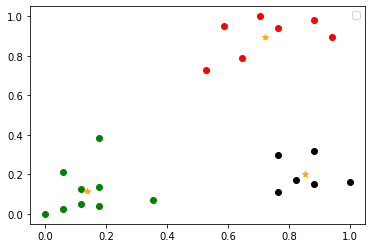

In [17]:
plt.scatter(df0['Age'],df0['Income($)'],color = 'green')
plt.scatter(df1['Age'],df1['Income($)'],color ='red')
plt.scatter(df2['Age'],df2['Income($)'],color ='black')
plt.legend()
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='orange',marker ='*')

# Above all dataset  we use Assume cluster is 3 but when feature are maximum to find cluster  is not easy way
## so Use Elbow Method

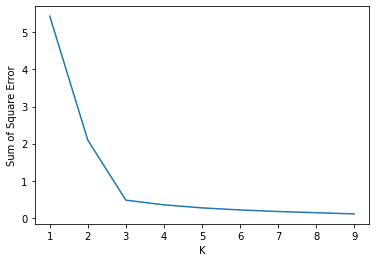

In [18]:
sse =[]
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    #SSE get from Interia
    sse.append(km.inertia_)
    sse
plt.xlabel("K")
plt.ylabel("Sum of Square Error")
plt.plot(k_rng,sse)

In [19]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.26640301246684156,
 0.21066678488010526,
 0.1685851223602976,
 0.13706529523670866,
 0.10383752586603562]

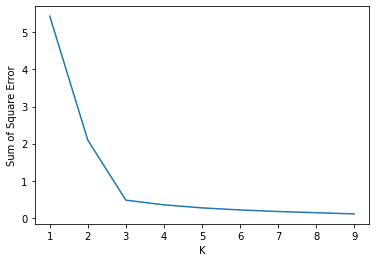

In [20]:
plt.xlabel("K")
plt.ylabel("Sum of Square Error")
plt.plot(k_rng,sse)